## Problem Set 3 -- Data Programming

> Question 1: Steps to Follow.

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men

In [1]:
#Importing the necessary libraries to perform the given instruction
import pandas as pd
import numpy as np

In [6]:
# Now after libraries I am creating a variable called USERS_VARIABLE and by read_csv reading the file from given URL.
USERS_INSTANT = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')

USERS_INSTANT

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [7]:
# Now in order to find what is the mean age per occupation. First we will groupby our daatframe by occupation column
# and then We will find the mean age by mean() function.
AGE_MEAN_PER_OCCU = USERS_INSTANT.groupby('occupation')['age'].mean()

# Displaying the mean age per occupation
AGE_MEAN_PER_OCCU

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [10]:
# In this part we will find the male ratio per occupation and we have to sort it from the most to the least.
# So for this first we will clculate the male ratio by grouping the dataframe by occupation.
# and after that we will apply the lambda function to computes the ratio of males to the occupation.
MALE_RATIO_PER_OCCU = USERS_INSTANT.groupby('occupation').apply(lambda m: sum(m['gender'] == 'M') / len(m))

MALE_RATIO_PER_OCCU.sort_values(ascending=False, inplace=True) # Now we will sort the values of MALES_RATIO_PER_OCCU in the descending order.

# Showing the results.
MALE_RATIO_PER_OCCU

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [15]:
# Here we are calculating the minimum and maximum ages for each occupation.
# First I have Grouped the dataframe by occupation and used the agg() function to find both minimum and maximum ages.
MIN_MAX_AGE = USERS_INSTANT.groupby('occupation')['age'].agg(['min', 'max'])

# Displaying the results.
MIN_MAX_AGE

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [17]:
# To find mean age for combination of occupation and sex 
# I have Grouped our dataframe by both 'occupation' and 'gender' column and by agg() function we can calculate the mean of age.
AGE_MEAN_PER_COMB = USERS_INSTANT.groupby(['occupation', 'gender']).agg({'age': 'mean'})

AGE_MEAN_PER_COMB

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

> By observing above result we can see all the mean age per occupation and gender. Also For the occupation of doctor we do not have female records.

In [21]:
# Now we will find out the percentage of both male and female working in every listed occupation.
# Fo that I have grouped the occupation columns and then I have selected gender column for the grouped data.
# then next with the value_counts we are counting the occurance of male and female and multiplying by 100 will give us the precentage.
GENDER_PERCENTAGE = USERS_INSTANT.groupby('occupation')['gender'].value_counts(normalize=True)* 100

GENDER_PERCENTAGE

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

> Question 2 Steps To Follow:

Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goals

Step 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [22]:
# We have already added the necessary libraries in the question 1 so we do not have to install it again.
# So I will import the dataset from given URL and then assign it to instant called euro12.

EURO_12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

# Displaying the first few rows of the dataset
EURO_12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [25]:
# Selectiong only goal column.

EURO_12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [29]:
# Finding the total number of team.
EURO_12['Team'].count()

16

In [35]:
# The total number of columns in the given dataset.
print("Total Columns In EURO_2012 Dataset:", EURO_12.shape[1])

Total Columns In EURO_2012 Dataset: 35


In [37]:
# Showing only Team, Yellow Cards and Red Cards columns and assigning them to a dataframe named as discipline
DISCIPLINE = EURO_12[["Team", "Yellow Cards", "Red Cards"]]

DISCIPLINE

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [39]:
# Sorting the teams by Red Cards, then to Yellow Cards
SORTED_TEAMS = DISCIPLINE.sort_values(["Red Cards", "Yellow Cards"], ascending=[False, False])

# Here we will see the data first sorted according to red cards and then followed by yellow card.
SORTED_TEAMS

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [40]:
# Calculating the mean Yellow Cards given per Team
EURO_12.groupby('Team')['Yellow Cards'].mean()   

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [46]:
# Teams data who have scored more than 6 goals
TEAMS = EURO_12['Goals']

EURO_12[TEAMS > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [47]:
# Showing the teams that start with G
EURO_12[EURO_12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [48]:
# The first 7 columns
EURO_12.iloc[ : , :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [49]:
# All columns except the last 3
EURO_12.iloc[ : , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [52]:
# Only the Shooting Accuracy from England, Italy and Russia with the help of isin method where we check that given names are in the list or not. 
REQUIRED_TEAMS = ['England', 'Italy', 'Russia']
SHOOTING_ACCU_EIR = EURO_12[EURO_12['Team'].isin(REQUIRED_TEAMS)][['Team', 'Shooting Accuracy']]

SHOOTING_ACCU_EIR

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


> Question 3
    Housing
    
    Step 1. Import the necessary libraries
    Step 2. Create 3 differents Series, each of length 100, as follows:
        • The first a random number from 1 to 4
        • The second a random number from 1 to 3
        • The third a random number from 10,000 to 30,000
    Step 3. Create a DataFrame by joinning the Series by column
    Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
    Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
    Step 6. Ops it seems it is going only until index 99. Is it true?
    Step 7. Reindex the DataFrame so it goes from 0 to 299

In [53]:
# Importing the libraries.
import random

In [54]:
# step 2 creating the series according to the requirements.
np.random.seed(42)
# giving low and high to meet the requirement and size 100 or all three of them
FIRST = pd.Series(np.random.randint(low=1, high=5, size=100))
SECOND = pd.Series(np.random.randint(low=1, high=4, size=100))
THIRD = pd.Series(np.random.randint(low=10000, high=30001, size=100))

In [56]:
FIRST, SECOND , THIRD

(0     3
 1     4
 2     1
 3     3
 4     3
      ..
 95    2
 96    2
 97    4
 98    2
 99    1
 Length: 100, dtype: int32,
 0     3
 1     2
 2     2
 3     2
 4     2
      ..
 95    1
 96    2
 97    1
 98    1
 99    2
 Length: 100, dtype: int32,
 0     23931
 1     13627
 2     26157
 3     20173
 4     28047
       ...  
 95    11154
 96    14499
 97    16295
 98    22183
 99    22874
 Length: 100, dtype: int32)

In [58]:
# now we will create the dataframe from the above series.
SERIES_DF = pd.concat([FIRST, SECOND, THIRD], axis=1)
SERIES_DF

,0,1,2
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047
...,...,...,...
95,2,1,11154
96,2,2,14499
97,4,1,16295
98,2,1,22183


In [59]:
# Assigning the names for the column.
SERIES_DF.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
SERIES_DF

,bedrs,bathrs,price_sqr_meter
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047
...,...,...,...
95,2,1,11154
96,2,2,14499
97,4,1,16295
98,2,1,22183


In [69]:
# Creating a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
BIGCOLUMN = pd.concat([FIRST, SECOND, THIRD]) # combining the columns


In [70]:
BIGCOLUMN = pd.DataFrame(BIGCOLUMN, columns=['BIGCOLUMN']) # Assigning name and creating a dataframe
BIGCOLUMN

,BIGCOLUMN
0,3
1,4
2,1
3,3
4,3
...,...
95,11154
96,14499
97,16295
98,22183


In [72]:
# Ops it seems it is going only until index 99. Is it true?
print(len(BIGCOLUMN)) 

300


> Here we can see that result suggest that we have 300 data but it's index is not 0 to 299 it is repeating the index for the three times. 

In [88]:
# Reindex the DataFrame so it goes from 0 to 299
BIGCOLUMN = pd.concat([FIRST, SECOND, THIRD], ignore_index = True)# Reindexing the DataFrame
BIGCOLUMN = pd.DataFrame(BIGCOLUMN, columns=['bigcolumn'])
BIGCOLUMN

,bigcolumn
0,3
1,4
2,1
3,3
4,3
...,...
295,11154
296,14499
297,16295
298,22183


> Now we have a dataframe where index is 0 to 299 instead of 0 to 99.

> #### Question 4
    Wind Statistics
    The data have been modified to contain some missing values, identified by NaN.
    Using pandas should make this exercise easier, in particular for the bonus question.
    You should be able to perform all of these operations without using a for loop or other looping construct.
    The data in 'wind.data' has the following format:
    Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
    61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
    61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
    61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
    The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
    
    Step 1. Import the necessary libraries
    Step 2. Import the dataset from the attached file wind.txt
    Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
    Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
    Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
    Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
    Step 7. Compute how many non-missing values there are in total.
    Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
    A single number for the entire dataset.
    Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
    A different set of numbers for each location.
    Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
    A different set of numbers for each day.
    Step 11. Find the average windspeed in January for each location.
    Treat January 1961 and January 1962 both as January.
    Step 12. Downsample the record to a yearly frequency for each location.
    Step 13. Downsample the record to a monthly frequency for each location.
    Step 14. Downsample the record to a weekly frequency for each location.
    Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [95]:
# Libraries
import datetime # otherlibraries we have already installed in the question 1

In [109]:
# Reading the data from the wind.txt file and storing it in the data variable.
# parse date combines the first three columns and it will be parsed as date and time values
DATA = pd.read_csv("C:/Users/Raj Patel/Documents/College/Second Year/Ethan Davis/Problem Set 3/wind.txt", sep = "\s+", parse_dates = [[0,1,2]])
DATA

C:\Users\Raj Patel\AppData\Local\Temp\ipykernel_17652\2717114199.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DATA = pd.read_csv("C:/Users/Raj Patel/Documents/College/Second Year/Ethan Davis/Problem Set 3/wind.txt", sep = "\s+", parse_dates = [[0,1,2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [110]:
# Fixing the Year 2061.
def FIXING_YEAR(y):
    if y.year >=2061 :  # condition only the year above and equal to 2061 will get convert. 
        year = y.year - 100 # it will convert 2061 into 1961 
    else:
        year = y.year
    return datetime.date(year, y.month, y.day)

In [111]:
DATA['Yr_Mo_Dy'] = DATA['Yr_Mo_Dy'].apply(FIXING_YEAR) # applying the function to the first column.
DATA 

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [112]:
# for setting the right dates as the index I have used the set_index function and passed the yr_Mo_Dy column as an argument.
DATA["Yr_Mo_Dy"] = pd.to_datetime(DATA["Yr_Mo_Dy"])
DATA = DATA.set_index('Yr_Mo_Dy')

In [113]:
DATA

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [116]:
# Finding the null values from the dataset.
DATA.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [117]:
# Above we saw that how many null values are there for the each location. 
# Here we are removing the null values from the dataframe.
DATA = DATA.dropna()

In [118]:
DATA.isnull().sum() # now we can see there is no null data into our dataframe.

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [119]:
# Finding non missing values. 
DATA.notnull().sum()

RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

In [120]:
# above is the non missing value in each column 
# for finding we have to just sum it up
DATA.notnull().sum().sum() # total non missing value from dataframe.

78552

In [124]:
# First we are finding mean windspeed for the all the location
WIND_SPEED = DATA.mean()
WIND_SPEED

RPT    12.359979
VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64

In [125]:
# Now we will find mean of the WIND_SPEED variable.
WIND_SPEED.mean()  

10.222465245951726

In [126]:
# creating a DataFrame called loc_stats where we will have the min, max and mean windspeeds and std
# of the windspeeds at each location over all the days.
LOC_STATS = pd.DataFrame({
    
    'minimum': DATA.min(),
    'maximum': DATA.max(),
    'mean': DATA.mean(),
    'std': DATA.std()
    
})

In [127]:
LOC_STATS

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


In [128]:
# Here also we will find the min, max, mean and std but for the each day instead of each location. 
DAY_STATS = pd.DataFrame({
    
    'minimum': DATA.min(axis =1),
    'maximum': DATA.max(axis =1),
    'mean': DATA.mean(axis =1),
    'std': DATA.std(axis =1)
    
})

In [129]:
DAY_STATS

,minimum,maximum,mean,std
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [135]:
# Finding the average windspeed for the month of january.
AVG_JANUARY = DATA[DATA.index.month == 1] # First filtering the data for january month

In [136]:
AVG_JANUARY.mean()# now finding the mean for the filtered data.

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [144]:
# Downsampling the record to a yearly frequency for each location with the help of resample() and mean() 
YEARLY_DOWNSAMPLE_DATA= DATA.resample('Y').mean()

In [146]:
YEARLY_DOWNSAMPLE_DATA

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [147]:
# Now we resample the data by month.
MONTHLY_DOWNSAMPLE_DATA= DATA.resample('M').mean()

In [148]:
MONTHLY_DOWNSAMPLE_DATA

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [149]:
# And finally data downsampling by week.
WEEKLY_DOWNSAMPLE_DATA= DATA.resample('W').mean()

In [150]:
WEEKLY_DOWNSAMPLE_DATA

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [153]:
# Now we have to calculate the min, max, mean, and standard deviation of windspeeds for the first 52 weeks
# So for that we are reading the data from 1961-01-02' to '1961-12-31.
WEEKLY_DATA = DATA['1961-01-02':'1961-12-31'].resample('W').agg({
    # Here we are finding statistic data for each location.
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

In [154]:
WEEKLY_DATA

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  13.50  12.316000  1.421418   6.63  14.29  10.408000   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25   9.818000  4.853908   3.50  16.29   7.684000   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.901667  3.673850   3.96  11.54   7.645000   
1961-05-21   4.88  15.04   8.561667  3.857369   3.58  10.17   5.631667   
1961-05-28   4.96  10.92   7.550000  2.433828   3.67  11.17   6.536667   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13   9.826000  2.629340   6.34  11.42   8.310000   
1961-07-09   7.29  17.50  11.806667  4.005984   3.75  10.75   7.221667   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21   9.928000  4.931346   4.42  10.00   8.026000   
1961-08-20  13.13  18.91  15.471667  2.470590   7.25  13.62  10.513333   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.291667  1.250191   2.92  13.62   7.645000   
1961-10-01  10.34  19.12  14.850000  3.600911   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.905000   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  21.34  14.353333  7.143390   2.75  17.00  10.303333   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.638333  3.229622   3.29  11.79   6.886667   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

> #### Question 5
    Step 1. Import the necessary libraries
    Step 2. Import the dataset from this address.
    Step 3. Assign it to a variable called chipo.
    Step 4. See the first 10 entries
    Step 5. What is the number of observations in the dataset?
    Step 6. What is the number of columns in the dataset?
    Step 7. Print the name of all the columns.
    Step 8. How is the dataset indexed?
    Step 9. Which was the most-ordered item?
    Step 10. For the most-ordered item, how many items were ordered?
    Step 11. What was the most ordered item in the choice_description column?
    Step 12. How many items were orderd in total?
    Step 13.
        • Turn the item price into a float
        • Check the item price type
        • Create a lambda function and change the type of item price
        • Check the item price type
    Step 14. How much was the revenue for the period in the dataset?
    Step 15. How many orders were made in the period?
    Step 16. What is the average revenue amount per order?
    Step 17. How many different items are sold?

In [155]:
# Using the libraries from the above questions.

In [212]:
# Importing the dataset from the given address & Assigning it to a variable named as chipo.
CHIPO = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [213]:
CHIPO

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [214]:
# total number of the records in the dataset.
CHIPO.shape[0]

4622

In [215]:
# Total columns
CHIPO.shape[1]

5

> even in the display of the dataset we can see that we have 4622 rows and 5 columns.

In [216]:
# Name of all the columns.
print ('Column names :', CHIPO.columns)

Column names : Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [217]:
# Index of the dataset.
CHIPO.index

RangeIndex(start=0, stop=4622, step=1)

> here we can say that our index starts at 0 and ends at 4622

In [218]:
# finding the most popular item
POPULAR_ITEM = CHIPO.groupby('item_name') #first grouping by item_name 

In [219]:
POPULAR_ITEM = POPULAR_ITEM.sum() # finding the sum for all items

In [220]:
# here we are sorting the values according the quantity so we can know popular item. 
POPULAR_ITEM = POPULAR_ITEM.sort_values(['quantity'],ascending=False) 

In [221]:
POPULAR_ITEM

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...
Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $...
Chips and Guacamole,449959,506,0,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.9...
Steak Burrito,328437,386,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8...
Canned Soft Drink,304753,351,[Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...,$1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.2...
Chips,208004,230,0,$2.15 $2.15 $2.15 $2.15 $2.15 $2.15 $4.30 $2.1...
Steak Bowl,193752,221,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.99 $8.99 $11.75 $11.75 $8.99 $11.48 $9.25 $...
Bottled Water,175944,211,0,$1.09 $1.09 $1.09 $1.50 $1.50 $1.50 $3.00 $1.5...
Chips and Fresh Tomato Salsa,100419,130,0,$2.39 $2.39 $2.39 $2.95 $2.95 $2.95 $2.95 $2.3...


In [222]:
# For the most-ordered item, how many items were ordered?
POPULAR_ITEM.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


> for the most ordered item which is chicken bowl we can see that it was ordered 761 times.

In [223]:
# For the most popular item in the choice description column first we will gropu it then apply sum and sorting.
CHIPO.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


In [224]:
# Finding How many items were ordered in total.
CHIPO.quantity.sum()

4972

In [228]:
# First defining the lambda function
LAMBDA_FUNC = lambda x: float(x[1:-1])

In [226]:
# Applying the function
CHIPO.item_price = CHIPO.item_price.apply(LAMBDA_FUNC)

In [229]:
CHIPO.item_price.dtype # checking the price type.

dtype('float64')

In [233]:
# Total revenue
CHIPO['item_price'].sum()

34500.16

In [234]:
# How many order were made.
CHIPO.order_id.value_counts().count()

1834

In [240]:
# Average revenue per order

In [241]:
# Different items sold 
CHIPO.item_name.value_counts().count()

50

> #### Question 6
    Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
    Don't forget to label your axes!

In [242]:
import matplotlib.pyplot as plt  # for visualization

In [243]:
MARRIAGE_DIVORCE_DATA = pd.read_csv("C:/Users/Raj Patel/Documents/College/Second Year/Ethan Davis/Problem Set 3/us-marriages-divorces-1867-2014.csv")

In [244]:
MARRIAGE_DIVORCE_DATA

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


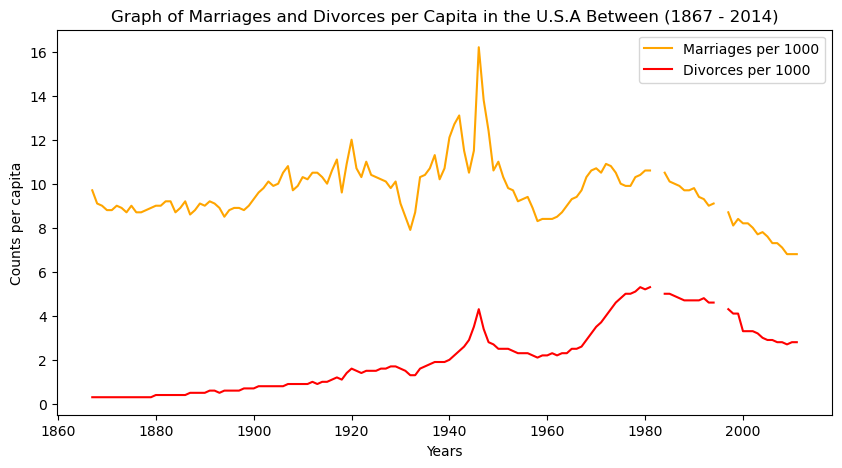

In [250]:
# Creating the plot with matplotlib
plt.figure(figsize=(10,5))

# marriages per capita
plt.plot(MARRIAGE_DIVORCE_DATA['Year'], MARRIAGE_DIVORCE_DATA['Marriages_per_1000'], label='Marriages per 1000', color='orange')

# Plotting divorces per capita
plt.plot(MARRIAGE_DIVORCE_DATA['Year'], MARRIAGE_DIVORCE_DATA['Divorces_per_1000'], label='Divorces per 1000', color='red')

#  labeling the axes and title
plt.xlabel('Years')
plt.ylabel('Counts per capita')
plt.title('Graph of Marriages and Divorces per Capita in the U.S.A Between (1867 - 2014)')
# Adding a legend
plt.legend()
# view
plt.show()

> #### Question 7
    Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
    Don't forget to label your axes!

In [251]:
# now we only require data for the 1900,1950 and 2000 so we will create a new dataframe with just those years in it.
# and we will do that by isin method
YEARS = MARRIAGE_DIVORCE_DATA.loc[MARRIAGE_DIVORCE_DATA.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
YEARS

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


([<matplotlib.axis.XTick at 0x1ef2af8f590>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

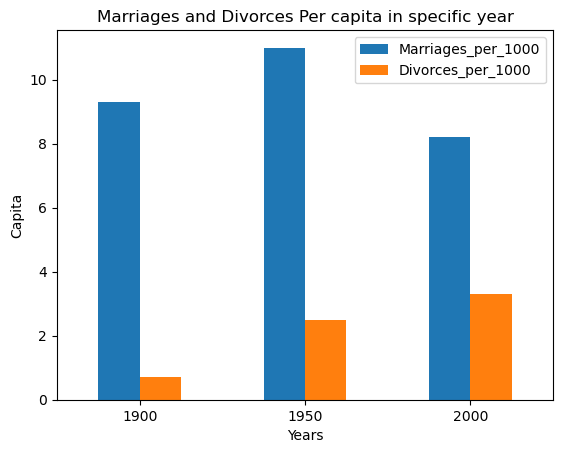

In [269]:
# Here .plot.bar will create a bar chart for the data. 
YEARS[['Marriages_per_1000', 'Divorces_per_1000']].plot.bar() 
# Giving labels to the axis and title. 
plt.title("Marriages and Divorces Per capita in specific year")
plt.xlabel('Years')
plt.ylabel('Capita')
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

> #### Question 8 
    Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [271]:
ACTOR_KILL_COUNTS = pd.read_csv("C:/Users/Raj Patel/Documents/College/Second Year/Ethan Davis/Problem set 3/actor_kill_counts.csv")

In [272]:
ACTOR_KILL_COUNTS

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


Text(0, 0.5, 'Actor')

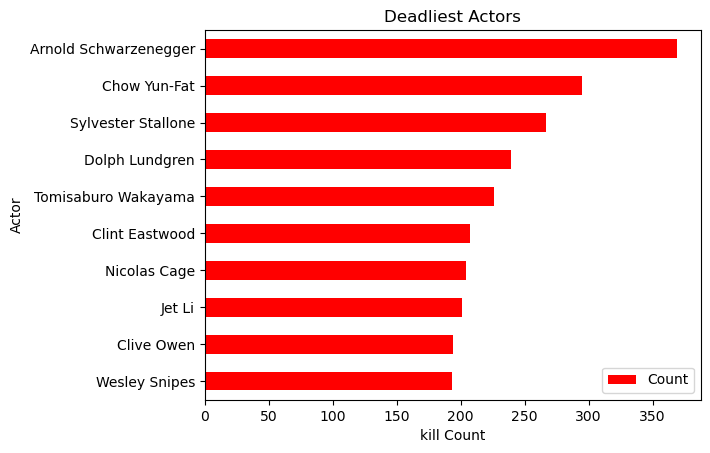

In [286]:
SORT_DATA = ACTOR_KILL_COUNTS.sort_values("Count", ascending = True)
# barh is a function for the horizontal chart.
SORT_DATA.plot.barh(x='Actor', y='Count', color = 'red') # assigning each bar with the actors name.
plt.title('Deadliest Actors')
# labling the axes.
plt.xlabel('kill Count')
plt.ylabel('Actor')

> #### Question 9
    Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
    Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [287]:
# Loading the data from csv.
ROMAN_EMPIRE = pd.read_csv('C:/Users/Raj Patel/Documents/College/Second Year/Ethan Davis/Problem set 3/roman-emperor-reigns.csv')

In [290]:
ROMAN_EMPIRE

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [292]:
# grouping the data by cause of death and counting all the unique value of the emperor column.
GROUPBY = ROMAN_EMPIRE.groupby("Cause_of_Death")['Emperor'].count()

<Axes: ylabel='Emperor'>

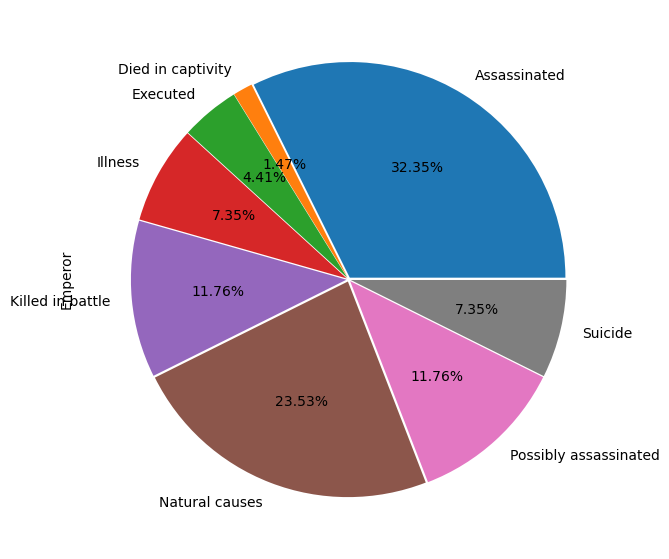

In [300]:
# Plotting the graph with percentage for each categories.
GROUPBY.plot.pie(explode=[0.01]*len(GROUPBY), figsize = (7,7),autopct="%.2f%%",) 

> #### Question 10
    Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
    Don't forget to label your axes!
    Color each dot according to its year.

In [304]:
import seaborn as sns # for scatter plot.
TOTAL_REVENUE = pd.read_csv("C:/Users/Raj Patel/Documents/College/Second Year/Ethan Davis/Problem set 3/arcade-revenue-vs-cs-doctorates.csv")

In [303]:
TOTAL_REVENUE

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<Axes: xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

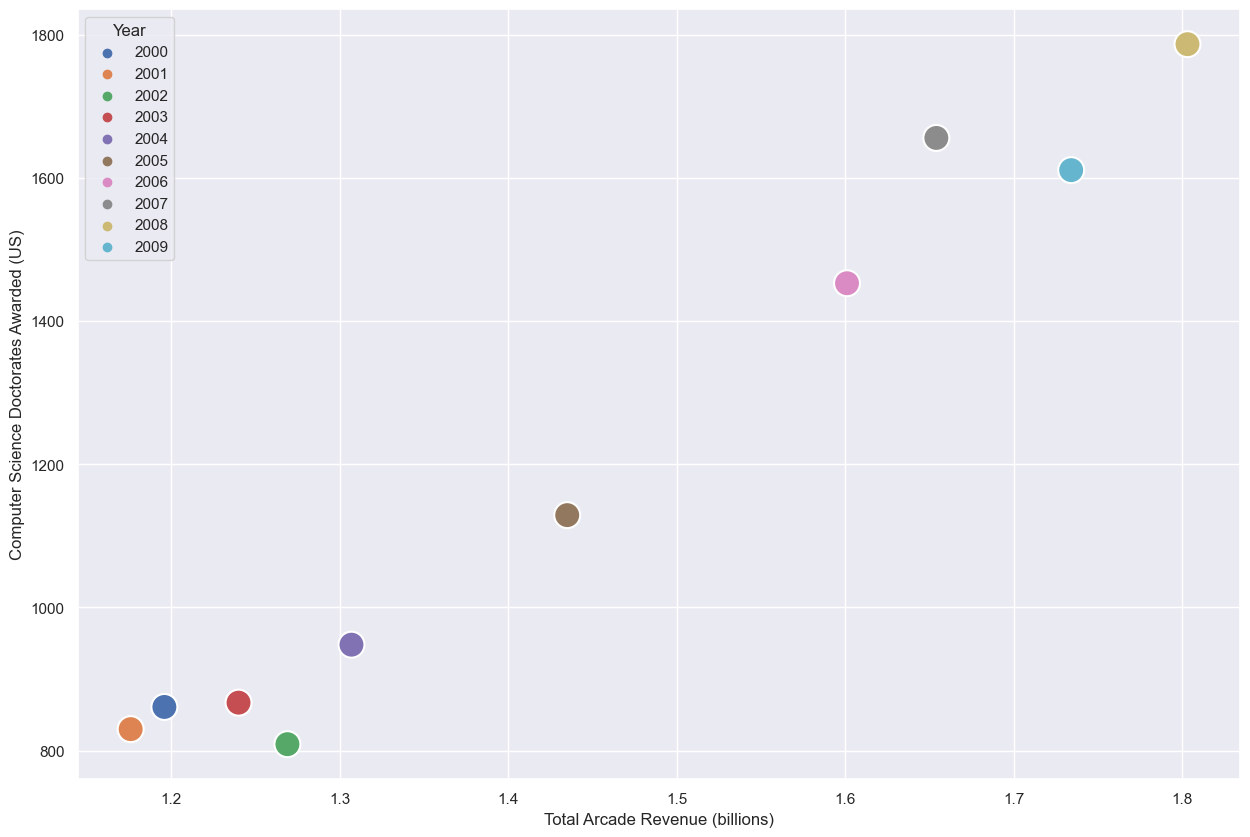

In [312]:
sns.set(rc = {'figure.figsize':(15,10)})
# by adding hue as a year we will have seperate circle for each color.
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)',hue='Year', data=TOTAL_REVENUE, palette="deep",s=350)